<a href="https://colab.research.google.com/github/sherlyanandaputri/DIFGR130_A_25_2311532017_SHERLYANANDAPUTRI/blob/main/Praktikum2/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

#load dataset
dataset_url = 'https://raw.githubusercontent.com/sherlyanandaputri/DIFGR130_A_25_2311532017_SHERLYANANDAPUTRI/refs/heads/main/diabetes.csv'
df = pd.read_csv(dataset_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#memisahkan antara fitur dan target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_cols]  #Features
Y = df.Outcome        #Target Variable

In [6]:
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


In [14]:
#Membagi X dan Y menjadi data training dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=16)

In [15]:
#import the class
from sklearn.linear_model import LogisticRegression

#instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

#fit the model with data
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confussion Matrix
1. True Positif
-> Model memprediksi positif dan hasilnya emang positif
2. False Positif
-> Model memprediksi positif, padahal aslinya negatif
3. False Negatif
-> Model memprediksi negatif, tapihasilnya sebenernya positif
4. True Negatif
-> Model memprdiksi negatif, dan hasilnya emang negatif

In [16]:
#import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[135,  12],
       [ 36,  48]])

135 true positif, 12 false positif, 36 false negatif, 48 true negatif

Text(0.5, 427.9555555555555, 'Predicted label')

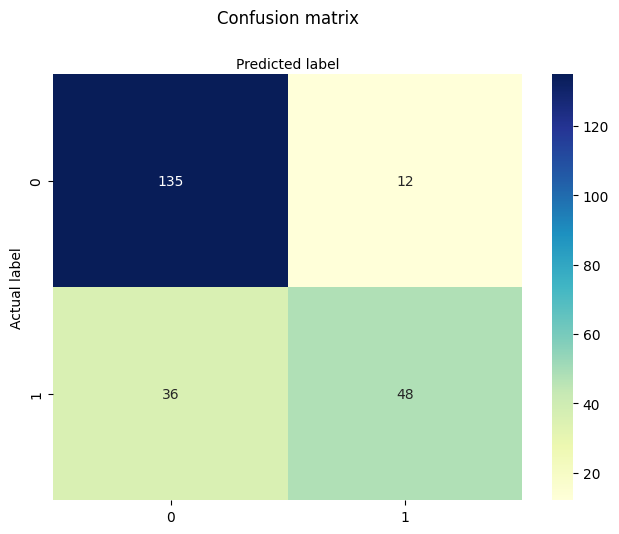

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(Y_test, Y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.92      0.85       147
   with diabetes       0.80      0.57      0.67        84

        accuracy                           0.79       231
       macro avg       0.79      0.74      0.76       231
    weighted avg       0.79      0.79      0.78       231



ROC = grafik yang digunakan untuk mengevaluasi kinerja model. Kurva RO ini menunjukkan antara True Positif Rate dan False Positif Rate pada berbagai ambang batas (treshold)

Kurva RO yang bagus adalah yang mendekati pojok kiri atas

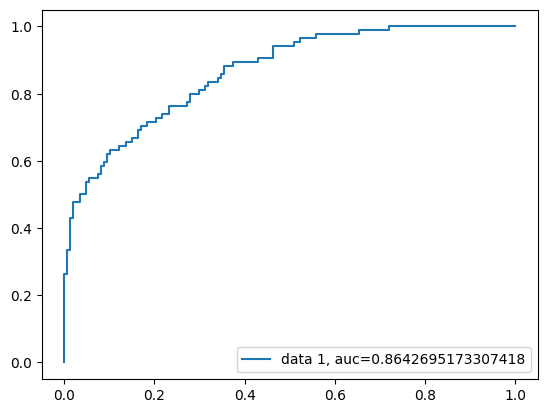

In [22]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
plt.show()

Area Under Curve(AUC)
- Untuk mempermudah interpretasi ROC Curve, kita bisa menghutung Area Under Curve(AUC), yaitu luas di bawah ROC curve
- AUC mengukur seberapa baik membedakan kelas positif  dan negatif (semakin tinggi, semakin baik)
- AUC Curve untuk case ini adalah 0.86